In [6]:
from kan import *
import scipy.constants as const

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = KAN(width=[1,5,1], grid=3, k=3, seed=2025, device=device);

checkpoint directory created: ./model
saving model version 0.0


In [5]:
import math

def create_dataset(train_num=1000, test_num=500):
    def generate_grav(num):
        t = torch.empty(num).uniform_(1, 100)

        F = torch.floor(23*torch.exp(0.1*t))

        y = F.unsqueeze(dim=1)

        print(t)
        print(F)

        x = torch.stack([t], dim=1)
        return x,y

    x_train, y_train = generate_grav(train_num)
    x_test, y_test = generate_grav(test_num)

    dataset = {}
    dataset['train_input'] = x_train.to(device)
    dataset['test_input'] = x_test.to(device)
    dataset['train_label'] = y_train.to(device)
    dataset['test_label'] = y_test.to(device)
    return dataset

dataset = create_dataset()

tensor([82.7175,  2.9836, 95.9673, 96.3341, 80.2948, 38.8940, 70.7798, 50.4917,
        98.7495, 21.2767, 60.0110, 49.4409, 64.0466,  5.7541, 35.7509, 36.5767,
        57.0349, 50.6399, 86.7637, 52.3010, 76.6636,  6.7235, 20.3291, 69.5859,
         4.3311, 89.7155, 60.0947, 90.2894, 63.2146, 92.5638, 64.8677, 76.0906,
         8.7534,  1.8328, 64.7481, 90.8378, 98.3187, 54.7382, 78.1143, 67.6384,
        14.6161, 62.9819, 18.7277,  8.7472, 31.6579, 96.3695, 84.0842, 19.5384,
        11.1623, 48.6090,  4.8951, 25.9777, 56.7206, 53.3139, 63.5385, 48.7448,
        41.0122,  1.8903, 21.4576, 71.5989, 72.5564, 37.7349, 48.7123, 95.9652,
        62.5476, 73.2960, 64.7923, 76.9749, 77.1317, 31.4981, 98.2247, 51.0444,
        39.8999,  5.6615, 73.2648, 69.6441, 39.5525, 55.4519, 16.1343, 23.6203,
        23.8125, 51.1625, 86.4678, 56.4745, 94.2545, 50.7378, 60.3476, 63.8848,
        89.9837, 55.2964, 75.7657, 76.8563, 54.1501, 49.2347, 61.9675, 43.4340,
        33.0669, 13.6345, 76.7012, 92.47

In [7]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.01);

| train_loss: 1.03e+04 | test_loss: 1.06e+04 | reg: 2.44e+06 | : 100%|█| 50/50 [00:06<00:00,  7.43it

saving model version 0.1


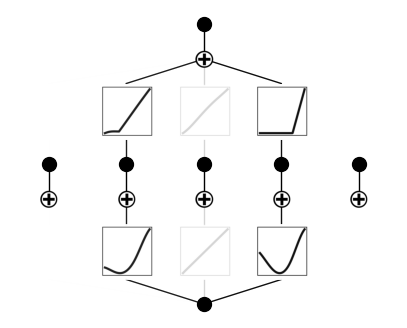

In [8]:
model.plot()

In [9]:
pruned_model = model.prune(node_th=1e-1, edge_th=1e-1)

saving model version 0.2


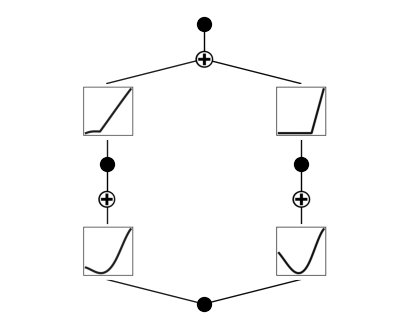

In [10]:
pruned_model.plot()

In [11]:
pruned_model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:08<00:00,  6.09it/s]

saving model version 0.3


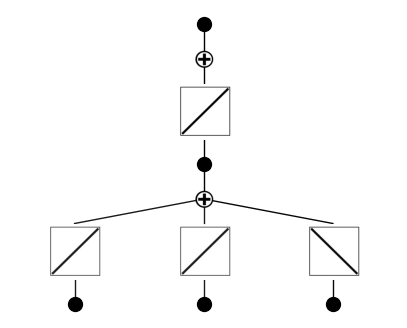

In [150]:
pruned_model.plot()

In [151]:
pruned_model.suggest_symbolic(0,0,0);
pruned_model.suggest_symbolic(0,1,0);
pruned_model.suggest_symbolic(0,2,0);
pruned_model.suggest_symbolic(1,0,0);

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        x    1.000000 -16.626942           1                1   -2.525388
1      x^2    1.000000 -16.626942           2                2   -1.725388
2      sin    1.000000 -16.584071           2                2   -1.716814
3      cos    1.000000 -16.575648           2                2   -1.715130
4      exp    0.999996 -16.168552           2                2   -1.633710
  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        x    1.000000 -16.626942           1                1   -2.525388
1      x^2    1.000000 -16.626942           2                2   -1.725388
2      sin    1.000000 -16.609640           2                2   -1.721928
3      cos    1.000000 -16.601067           2                2   -1.720213
4      exp    0.999999 -16.439498           2                2   -1.687900
  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        x         1.0 -1

In [152]:
pruned_model.fix_symbolic(0,0,0, 'x');
pruned_model.fix_symbolic(0,1,0, 'x');
pruned_model.fix_symbolic(0,2,0, 'x');
pruned_model.fix_symbolic(1,0,0, 'x');

Best value at boundary.
r2 is 1.0000001192092896
saving model version 0.4
r2 is 1.0000001192092896
saving model version 0.5
r2 is 1.000000238418579
saving model version 0.6
Best value at boundary.
r2 is 0.9999997019767761
saving model version 0.7


In [153]:
pruned_model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 3.69e-06 | test_loss: 3.81e-06 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 17.24it

saving model version 0.8


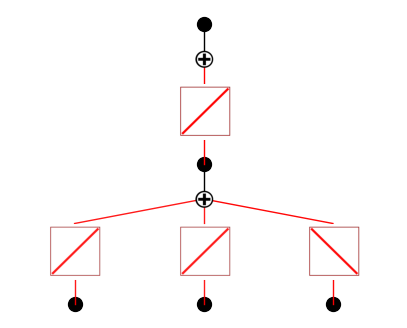

In [154]:
pruned_model.plot()

In [155]:
formula = pruned_model.symbolic_formula()[0][0]
ex_round(formula, 4)

10.0*x_1 + 10.0*x_2 - 14.0*x_3 + 17.8244

$10 x_1 + 10 x_2 - 14 x_3 + 17.8244$

$10\frac{x_1'-20}{10}+10\frac{x_2'-20}{10}-14\frac{x_3'-6}{7}+17.8244$ 

$x_1' + x_2' - 2x_3' - 10.1756$

$\log(x_1'') + \log(x_2'') - 2\log(x_3'') + \log(G)$

$\log(G\frac{x_1''*x_2''}{x_3''^2})$

$G \frac{x_1'''*x_2'''}{x_3'''^2}$